In [1]:
from models import *
from util import *
import glob
import re
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = glob.glob('models/stats/*.p')

def get_model(s):
    return re.compile('m_(.*)_r').search(s).group(1)

def get_threshold(s):
    return float(re.compile('t_(.*).p').search(s).group(1))

def get_features(s):
    return re.compile('f_(.*)_t').search(s).group(1)

def get_run(s):
    return int(re.compile('r_(.*)_f').search(s).group(1))

In [3]:
data_ls = []
for file in files:
    data = pickle.load(open(file, "rb"))
    data['model'] = get_model(file)
    data['run'] = get_run(file)
    data['threshold'] = get_threshold(file)
    data['features'] = get_features(file)
    data_ls.append(data)
    
df = pd.DataFrame(data_ls)

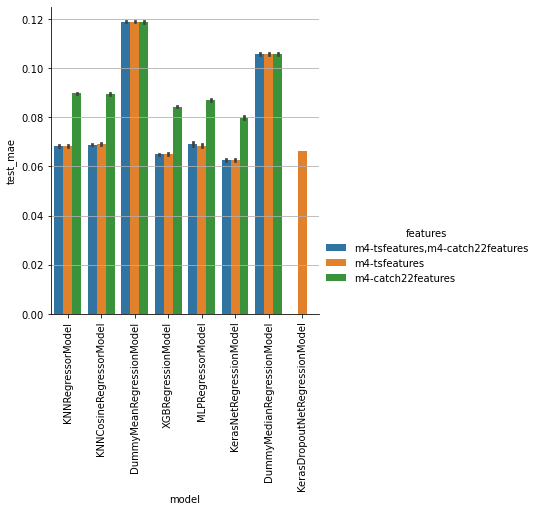

In [4]:
sns.catplot(x = "model",
            y = "test_mae",
            hue = "features",
            data = df[(df['threshold']==1.0)],
            kind = "bar")
plt.xticks(rotation=90)
plt.grid(axis='y')

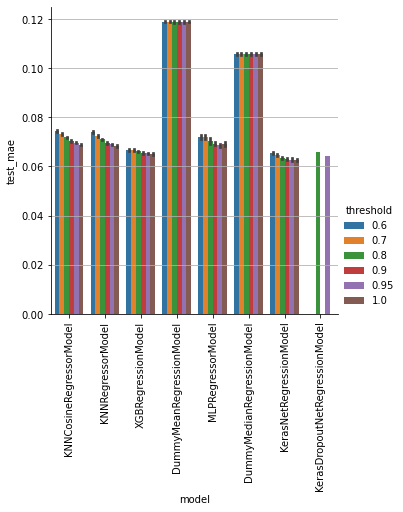

In [5]:
sns.catplot(x = "model",
            y = "test_mae",
            hue = "threshold",
            data = df[(df['features']=='m4-tsfeatures,m4-catch22features')],
            kind = "bar")
plt.xticks(rotation=90)
plt.grid(axis='y')

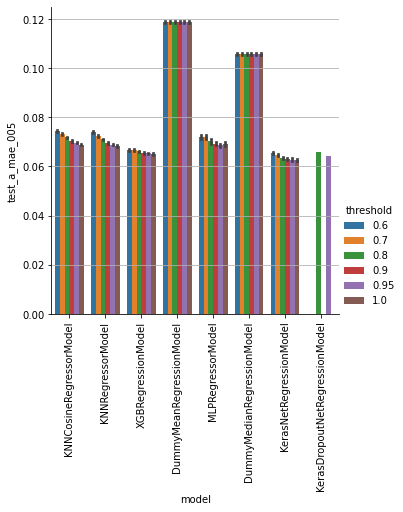

In [6]:
sns.catplot(x = "model",
            y = "test_a_mae_005",
            hue = "threshold",
            data = df[(df['features']=='m4-tsfeatures,m4-catch22features')],
            kind = "bar")
plt.xticks(rotation=90)
plt.grid(axis='y')

In [7]:
df.columns

Index(['test_mae', 'test_mse', 'train_mae', 'train_mse', 'test_a_mae_005',
       'test_a_mse_005', 'test_a_mae_009', 'test_a_mse_009', 'test_a_mae_024',
       'test_a_mse_024',
       ...
       'train_a_mae_SES', 'train_a_mse_SES', 'train_a_mae_Theta',
       'train_a_mse_Theta', 'train_a_mae_sNaive', 'train_a_mse_sNaive',
       'model', 'run', 'threshold', 'features'],
      dtype='object', length=252)

In [8]:
#df[(df['threshold']==1.0) & (df['features']=='m4-tsfeatures,m4-catch22features')]